## Homework 2 - Data Exploration using Census Data (Due at 12:45 PM on 01/31)

In this homework assignment you will use census data from the 1994 and 1995 current population surveys conducted by the U.S. Census Bureau. A copy of this dataset is located at UCI Machine Learning repository, please see this [link](https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29) to reach to the dataset website.

This dataset contains census data extracted from the 1994 and 1995 Current Population Surveys. We will only work with 'training' data (a link to that is provided to you below). The data contains 41 demographic and employment related variables. The abbreviated column names provided to you below. You are expected to read the documentation of this dataset, understand the features and preprocess this dataset. Additional information can be found [in the data description](https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.data.html) and [additional comments](https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.names).

Below you will find a code snippet to read the data into a pandas dataframe. You can alternatively download it yourself, extract and read it manually. The questions are shown in the subsequent cells. You need to provide your answers in this file. 

Your code is expected to have no errors, please make sure all your cells run properly before submitting (click Kernel->Restart & Run All to see if your code sequence works). 

### Statement of Non-cheating and honest collaboration:

I have been informed of the academic honesty policies of Georgia State University. I will abide by those policies. I have written up the solutions below by myself and understand what I have turned in. I collaborated and discussed the problems with the following people: ```Paige; Prince; Richmond```

Signed,
```Jesse Annan```

__Please change the notebook's name and add your name before submitting.__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# columns (feature) abbreviations
columns_abbr = ['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC',
                'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 
                'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWT', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 
                'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 
                'VETQVA', 'VETYN', 'WKSWORK', 'YEAR', 'PTOTVALB']

In [3]:
censusdata = pd.read_csv('census-income.csv', names=columns_abbr, sep=r',', skipinitialspace=True)
df = censusdata.copy()
df.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,PTOTVALB
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AAGE      199523 non-null  int64  
 1   ACLSWKR   199523 non-null  object 
 2   ADTIND    199523 non-null  int64  
 3   ADTOCC    199523 non-null  int64  
 4   AHGA      199523 non-null  object 
 5   AHRSPAY   199523 non-null  int64  
 6   AHSCOL    199523 non-null  object 
 7   AMARITL   199523 non-null  object 
 8   AMJIND    199523 non-null  object 
 9   AMJOCC    199523 non-null  object 
 10  ARACE     199523 non-null  object 
 11  AREORGN   198649 non-null  object 
 12  ASEX      199523 non-null  object 
 13  AUNMEM    199523 non-null  object 
 14  AUNTYPE   199523 non-null  object 
 15  AWKSTAT   199523 non-null  object 
 16  CAPGAIN   199523 non-null  int64  
 17  CAPLOSS   199523 non-null  int64  
 18  DIVVAL    199523 non-null  int64  
 19  FILESTAT  199523 non-null  object 
 20  GRIN

### Q1 - Basic Dataset Manipulation [20 pts]

#### Q1.1 Find the minimum and maximum wage per hour (AHRSPAY) for participants with an education level (AHGA) of 'Some college but no degree' in the Census-Income (KDD) dataset. (5 pts)






In [5]:
some_college = df[df['AHGA'] == 'Some college but no degree']

min_wage_some_college = some_college['AHRSPAY'].min()
max_wage_some_college = some_college['AHRSPAY'].max()

print(f'Minimum wage per hour = {min_wage_some_college} \nMaximum wage per hour = {max_wage_some_college}')

Minimum wage per hour = 0 
Maximum wage per hour = 8600


#### Q1.2 Find the difference in mean wage per hour (AHRSPAY) for the participants with an education level (AHGA) of 'Bachelors degree(BA AB BS)' and 'Masters degree(MA MS MEng MEd MSW MBA)' respectively. (5 pts)


In [6]:
bsdegree = df[df['AHGA'] == 'Bachelors degree(BA AB BS)']
msdegree = df[df['AHGA'] == 'Masters degree(MA MS MEng MEd MSW MBA)']

mean_wage_bsdegree = bsdegree['AHRSPAY'].mean()
mean_wage_msdegree = msdegree['AHRSPAY'].mean()

wage_diff = mean_wage_bsdegree - mean_wage_msdegree
print(f' Mean wage difference of Bachelors and Masters degree is {wage_diff}')

 Mean wage difference of Bachelors and Masters degree is 20.147920062624216


#### Q1.3 Find the standard deviation of the ages (AAGE) of the top 15% oldest participants (5 pts)


In [7]:
from math import floor
sorted_df = df.sort_values('AAGE', ascending=False)
top15 = floor(sorted_df.shape[0] * .15)
stdd = sorted_df['AAGE'][:top15].std()

print(f'Standard deviation of top 15% oldest participants is {stdd}.')

Standard deviation of top 15% oldest participants is 7.560142994417219.


#### Q1.4 Find the percentage of participants who are older than 50 years in the Census-Income (KDD) dataset (5 pts)


In [8]:
older_than50 = df[df['AAGE'] > 50]
perc = older_than50.shape[0] / df.shape[0] * 100

print(f'There is approximately {perc:.2f}% of participants older than 50 years.')

There is approximately 24.14% of participants older than 50 years.


### Q2 - Identify the data scales and data types for each variable in census data. Identify the domain for each variable by checking the attributes' values. Then, create a data quality report for both categorical (nominal, ordinal) and continuous (interval, ratio) variables. [60 pts]


#### Q2.1 Identifying the characteristics (20 pts)
For data scales, identify whether an attribute is nominal, ordinal, interval, or ratio scale.
For data types, identify the domain and provide an appropriate data type (integer, float, String, date, Boolean). See if that data type is correct in your dataframe.
For domain, inspect each distinct value for each attribute. Identify missing values. 

You can create an external csv file consisting five [or more] columns (including feature name, description, scale, data type, and domain) and display it. A template is provided (See ___features.csv___). To understand what these features represent, please check the original documentation.

Please include this file in your submission to get points.

In [9]:
# domain of features
domain_list = []
for i in range(len(columns_abbr)):
    md = {k: v for k, v in zip([columns_abbr[i]], [df[columns_abbr[i]].unique()])}
    domain_list.append(md)
print(domain_list)

[{'AAGE': array([73, 58, 18,  9, 10, 48, 42, 28, 47, 34,  8, 32, 51, 46, 26, 13, 39,
       16, 35, 12, 27, 56, 55,  2,  1, 37,  4, 63, 25, 81, 11, 30,  7, 66,
       84, 52,  5, 36, 72, 61, 41, 90, 49,  6,  0, 33, 57, 50, 24, 17, 53,
       40, 54, 22, 29, 85, 38, 76, 21, 31, 74, 19, 15,  3, 43, 68, 71, 45,
       62, 23, 69, 75, 44, 59, 60, 64, 65, 70, 67, 78, 20, 14, 83, 86, 89,
       77, 79, 82, 80, 87, 88])}, {'ACLSWKR': array(['Not in universe', 'Self-employed-not incorporated', 'Private',
       'Local government', 'Federal government',
       'Self-employed-incorporated', 'State government', 'Never worked',
       'Without pay'], dtype=object)}, {'ADTIND': array([ 0,  4, 40, 34, 43, 37, 24, 39, 12, 35, 45,  3, 19, 29, 32, 48, 33,
       23, 44, 36, 31, 30, 41,  5, 11,  9, 42,  6, 18, 50,  2,  1, 26, 47,
       16, 14, 22, 17,  7,  8, 25, 46, 27, 15, 13, 49, 38, 21, 28, 20, 51,
       10])}, {'ADTOCC': array([ 0, 34, 10,  3, 40, 26, 37, 31, 12, 36, 41, 22,  2, 35, 25, 23, 42,
 

In [10]:
# counting missing values
missing_type = [np.nan, '?', 'Not in universe', 'Not in universe or children', 'Not in universe under 1 year old']

for i in range(len(columns_abbr)):
    print(f'missing values in {columns_abbr[i]} = {df[df[columns_abbr[i]].isin(missing_type)].shape[0]}')

missing values in AAGE = 0
missing values in ACLSWKR = 100245
missing values in ADTIND = 0
missing values in ADTOCC = 0
missing values in AHGA = 0
missing values in AHRSPAY = 0
missing values in AHSCOL = 186943
missing values in AMARITL = 0
missing values in AMJIND = 100684
missing values in AMJOCC = 100684
missing values in ARACE = 0
missing values in AREORGN = 874
missing values in ASEX = 0
missing values in AUNMEM = 180459
missing values in AUNTYPE = 193453
missing values in AWKSTAT = 0
missing values in CAPGAIN = 0
missing values in CAPLOSS = 0
missing values in DIVVAL = 0
missing values in FILESTAT = 0
missing values in GRINREG = 183750
missing values in GRINST = 184458
missing values in HHDFMX = 0
missing values in HHDREL = 0
missing values in MARSUPWT = 0
missing values in MIGMTR1 = 101212
missing values in MIGMTR3 = 101212
missing values in MIGMTR4 = 101212
missing values in MIGSAME = 101212
missing values in MIGSUN = 183750
missing values in NOEMP = 0
missing values in PARENT 

#### Remark:
* **Domain of Features:** <br>
Quanlitative Features - the domain of these features is a set of the unique entries in the particular column.
Qunatitative Features - the domain is a set of values from the min to the max value in that particular column.

* **Missing Values:** <br>
Inspecting the unique values, I suspect `[np.nan, '?', 'Not in universe', 'Not in universe or children', 'Not in universe under 1 year old']` to be the missing values in the census data set.
I did not consider `'Do not know'` - a unique entry of 'AREORGN' (Hispanic Origin) because I accept that as a viable response, insinuating that one may not necessarily know their roots.

In [11]:
# N, O, I, R are Nominal, Ordinal, Interval, Ratio
features_df = pd.read_csv('./features.csv', index_col ='col_name')
features_df.head()

,desc,data_type,"scale (N, O, I, R)",domain,missing_values
col_name,,,,,
AAGE,age,Int64,R,"{0, 1, 2, ...,90}",0
ACLSWKR,class of worker,String,N,"{'Self-employed-not incorporated', 'Private', ...",100245
ADTIND,industry code,Int64,N,"{0, 1, 2, ..., 51}",0
ADTOCC,occupation code,Int64,N,"{0, 1, 2, ..., 46}",0
AHGA,education,String,O,"{'High school graduate', 'Some college but no ...",0


#### Q2.2 Create a Data Quality Report (40 pts)

Include the bar plots and histograms for visualizing the distributions. You may get your descriptions from features.csv file. 

The examples for a continuous and a categorical feature can be seen below. You do not need to use jupyter formatting provided here. You can print a DataFrame or read a csv, and display it. If you will read from a csv, make sure you have that csv in your submission zip file.

In [12]:
# creating a list of categorical and continuous features with their descriptions
continuous_features = []
categorical_features = []
cont_desc = []
cat_desc = []

for i in columns_abbr:
    if np.logical_or(features_df.loc[i,'scale (N, O, I, R)'] == 'N', features_df.loc[i,'scale (N, O, I, R)'] == 'O'):
        categorical_features.append(i)
        cat_desc.append(features_df.loc[i,'desc'])
    else:
        continuous_features.append(i)
        cont_desc.append(features_df.loc[i,'desc'])

In [13]:
# handling missing types / values
df = df.replace([mt for mt in missing_type], np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AAGE      199523 non-null  int64  
 1   ACLSWKR   99278 non-null   object 
 2   ADTIND    199523 non-null  int64  
 3   ADTOCC    199523 non-null  int64  
 4   AHGA      199523 non-null  object 
 5   AHRSPAY   199523 non-null  int64  
 6   AHSCOL    12580 non-null   object 
 7   AMARITL   199523 non-null  object 
 8   AMJIND    98839 non-null   object 
 9   AMJOCC    98839 non-null   object 
 10  ARACE     199523 non-null  object 
 11  AREORGN   198649 non-null  object 
 12  ASEX      199523 non-null  object 
 13  AUNMEM    19064 non-null   object 
 14  AUNTYPE   6070 non-null    object 
 15  AWKSTAT   199523 non-null  object 
 16  CAPGAIN   199523 non-null  int64  
 17  CAPLOSS   199523 non-null  int64  
 18  DIVVAL    199523 non-null  int64  
 19  FILESTAT  199523 non-null  object 
 20  GRIN

#### Remark:
* **Extracting Continuous and Categrical Features:** <br>
From my `feature.csv` file, col_name with norminal(N) and ordinal(O) scales are identified as categorical features while interval(I) and ratio(R) scales are identified as continuous features.

* **Handling Missing Values:** <br> 
I replaced all suspected missing values with `NaN`. This makes it easier to identify and count while creating the data quality report (below).

In [14]:
cont_quality_report = pd.DataFrame()

for idx, feature in enumerate(continuous_features):
    tempdf = pd.DataFrame()
    tempdf['Features'] = [feature]
    tempdf['Desc'] = [cont_desc[idx]]
    tempdf['Count'] = [df[feature].shape[0]]
    tempdf['% of Missing'] = [df[feature].isnull().sum()] / tempdf['Count'] * 100
    tempdf['Card.'] = [df[feature].nunique()]
    tempdf['Min.'] = [df[feature].describe()[3]]
    tempdf['Q1'] = [df[feature].describe()[4]]
    tempdf['Median'] = [df[feature].describe()[5]]
    tempdf['Q3'] = [df[feature].describe()[6]]
    tempdf['Max.'] = [df[feature].describe()[7]]
    tempdf['Mean'] = [df[feature].describe()[1]]
    tempdf['Std. Dev.'] = [df[feature].describe()[2]]
    cont_quality_report = pd.concat([cont_quality_report, tempdf], axis = 0, ignore_index = True)
    
cont_quality_report

,Features,Desc,Count,% of Missing,Card.,Min.,Q1,Median,Q3,Max.,Mean,Std. Dev.
0,AAGE,age,199523,0.0,91,0.00,15.000,33.00,50.00,90.0,34.494199,22.310895
1,AHRSPAY,wage per hour,199523,0.0,1240,0.00,0.000,0.00,0.00,9999.0,55.426908,274.896454
2,CAPGAIN,capital gains,199523,0.0,132,0.00,0.000,0.00,0.00,99999.0,434.718990,4697.531280
3,CAPLOSS,capital losses,199523,0.0,113,0.00,0.000,0.00,0.00,4608.0,37.313788,271.896428
4,DIVVAL,divdends from stocks,199523,0.0,1478,0.00,0.000,0.00,0.00,99999.0,197.529533,1984.163658
5,MARSUPWT,instance weight,199523,0.0,99800,37.87,1061.615,1618.31,2188.61,18656.3,1740.380269,993.768156
6,NOEMP,num persons worked for employer,199523,0.0,7,0.00,0.000,1.00,4.00,6.0,1.956180,2.365126
7,WKSWORK,weeks worked in year,199523,0.0,53,0.00,0.000,8.00,52.00,52.0,23.174897,24.411488


In [15]:
cat_quality_report = pd.DataFrame()

for idx, feature in enumerate(categorical_features):
    tempdf = pd.DataFrame()
    tempdf['Features'] = [feature]
    tempdf['Desc'] = [cat_desc[idx]]
    tempdf['Count'] = [df.shape[0]]
    tempdf['% of Missing'] = [df[feature].isnull().sum()] / tempdf['Count'] * 100
    tempdf['Card.'] = [df[feature].nunique()]
    tempdf['Mode'] = [df[feature].mode(dropna=True)[0]]
    tempdf['Mode Freq.'] = df[df[feature] == tempdf['Mode'][0]].shape[0]
    tempdf['Mode %'] = tempdf['Mode Freq.'] / tempdf['Count'] * 100
    tempdf['2nd Mode'] = [df[df[feature] != tempdf['Mode'][0]][feature].mode(dropna=True)[0]]
    tempdf['2nd Mode Freq.'] = df[df[feature] == tempdf['2nd Mode'][0]].shape[0]
    tempdf['2nd Mode %'] = tempdf['2nd Mode Freq.'] / tempdf['Count'] * 100
    cat_quality_report = pd.concat([cat_quality_report, tempdf], axis = 0, ignore_index = True)
    
cat_quality_report.head(7)

,Features,Desc,Count,% of Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
0,ACLSWKR,class of worker,199523,50.242328,8,Private,72028,36.100099,Self-employed-not incorporated,8445,4.232595
1,ADTIND,industry code,199523,0.000000,52,0,100684,50.462353,33,17070,8.555405
2,ADTOCC,occupation code,199523,0.000000,47,0,100684,50.462353,2,8756,4.388466
3,AHGA,education,199523,0.000000,17,High school graduate,48407,24.261363,Children,47422,23.767686
4,AHSCOL,enrolled in edu inst last wk,199523,93.694962,2,High school,6892,3.454238,College or university,5688,2.850799
5,AMARITL,marital status,199523,0.000000,7,Never married,86485,43.345880,Married-civilian spouse present,84222,42.211675
6,AMJIND,major industry code,199523,50.462353,23,Retail trade,17070,8.555405,Manufacturing-durable goods,9015,4.518276


#### Remark:
**Quality Report** <br>
* **Quantitative Quality Report** <br>
1. *Features* - extracted quantitative features from the the `feature.csv`.
2. *Desc* - actual description of each feature provided [here](https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29).
3. *Count* - the number of observations recorded in the census data set.
4. *% of Missing* -	percentage of missing values (np.nan).
5. *Card.* - the number of unique class(es) in a feature.
6. *Five Number Summary {Min, Q1, Median, Q3, Max}* - the min, max, 1st quartile, median, and 3rd quartile of a feature.
7. *Mean* - the mean of the column.
8. *Std. Dev.* - standard deviation of the column.

* **Categorical Quality Report** <br>
1. *Features* - extracted qualitative features from the the `feature.csv`.
2. *Desc* - actual description of each feature provided [here](https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29).
3. *Count* - the number of observations recorded in the census data set.
4. *% of Missing* - percentage of missing values (np.nan).
5. *Card.* - the number of unique class(es) in a feature.
6. *Mode, Mode Freq., Mode %* - the most occuring class, its frequency, and ratio of occurance.
7. *2nd Mode, 2nd Mode Freq., 2nd Mode %* - the second most occuring class, its frequency, and ratio of occurance.

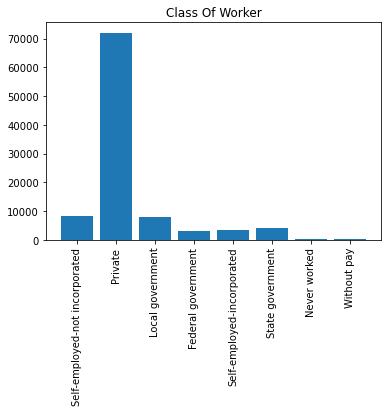

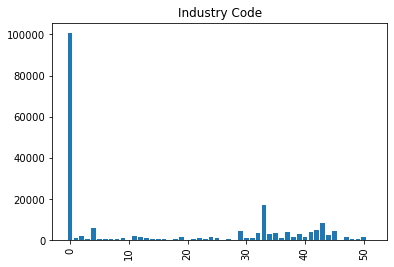

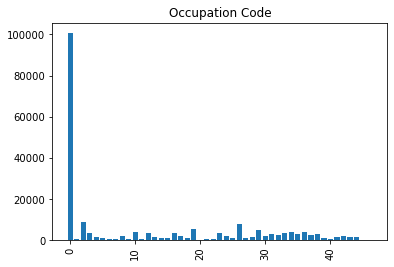

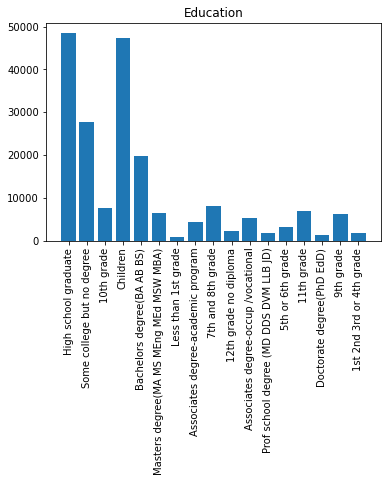

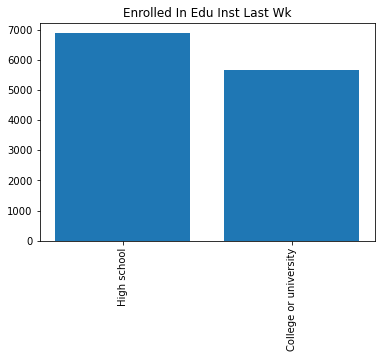

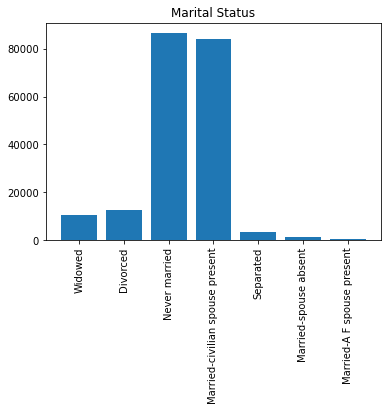

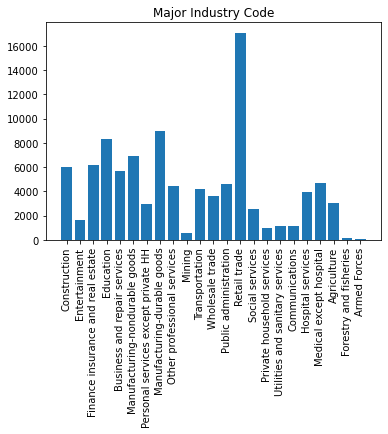

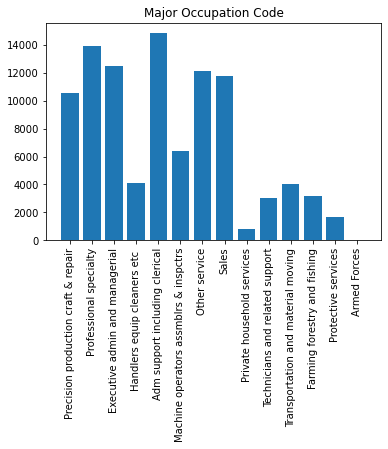

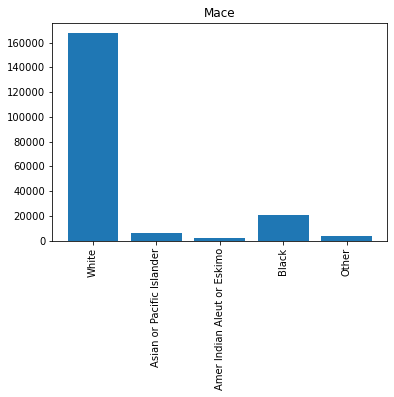

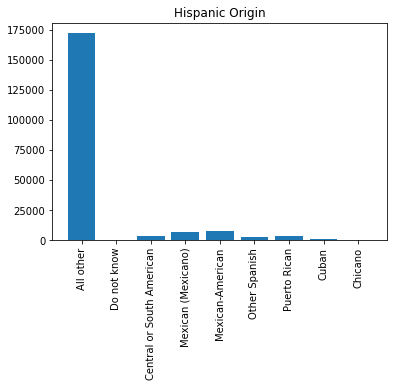

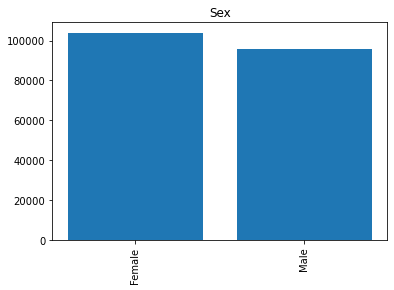

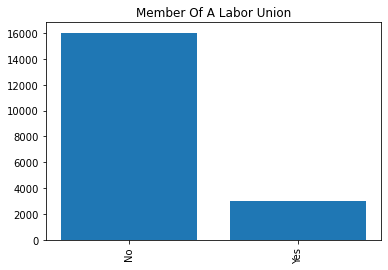

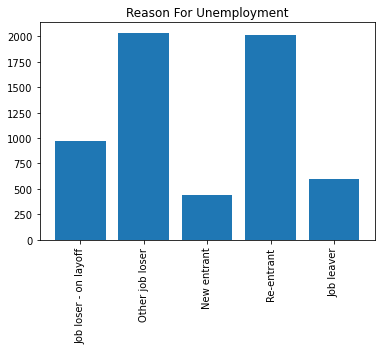

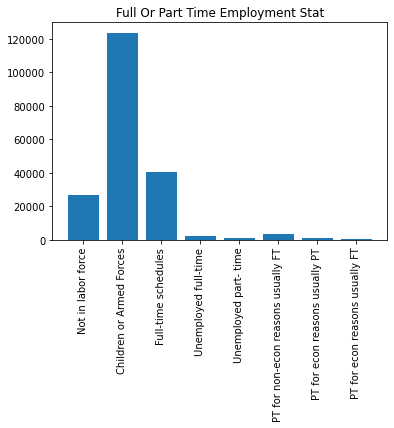

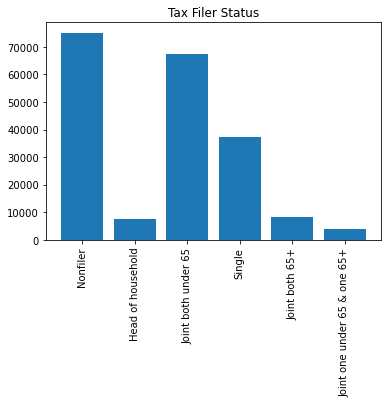

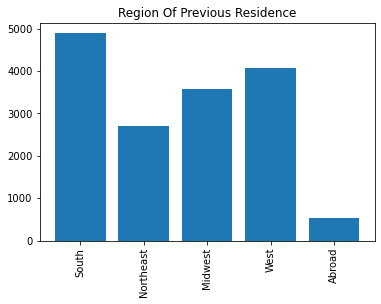

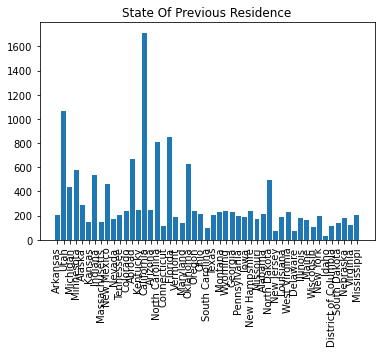

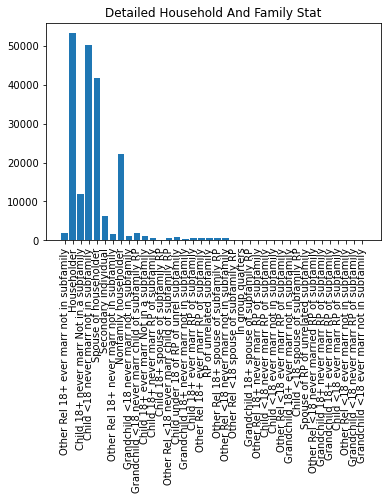

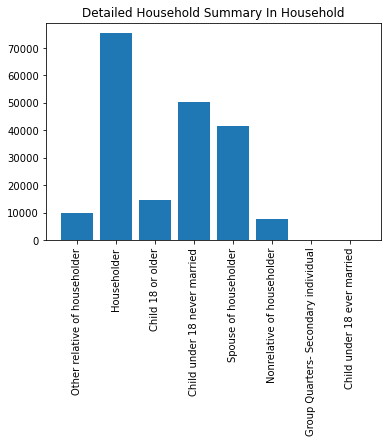

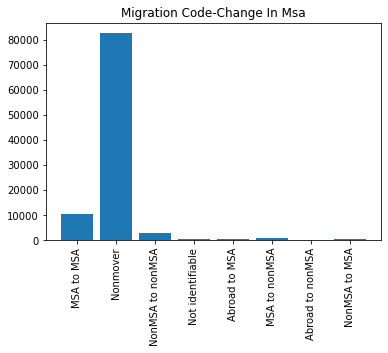

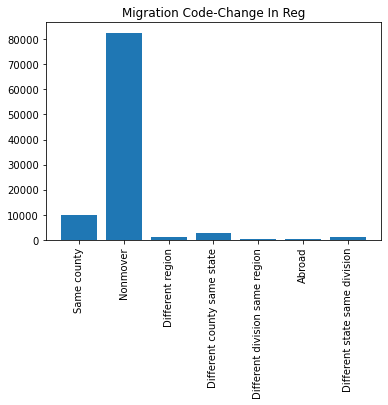

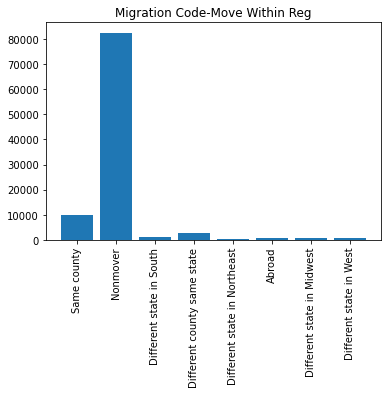

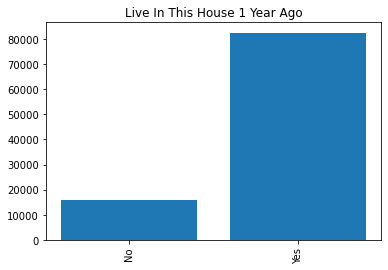

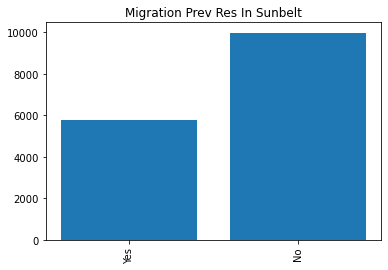

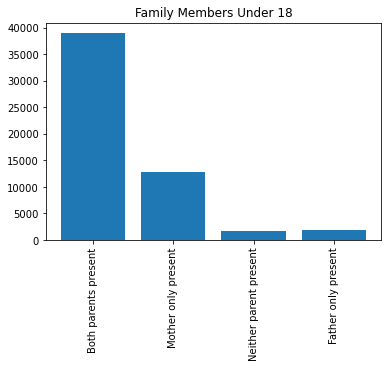

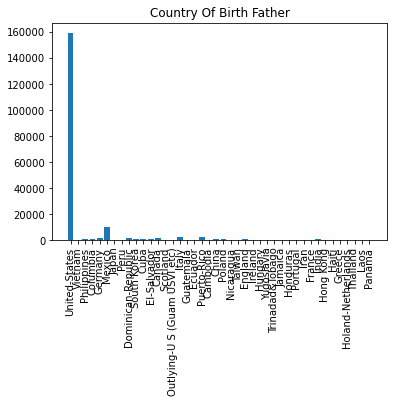

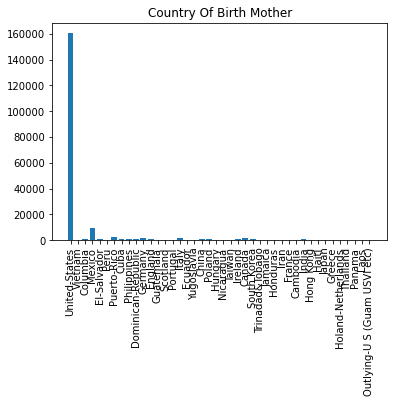

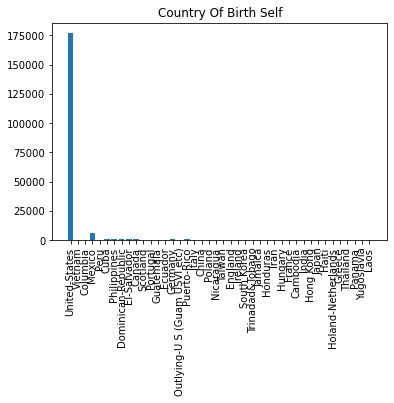

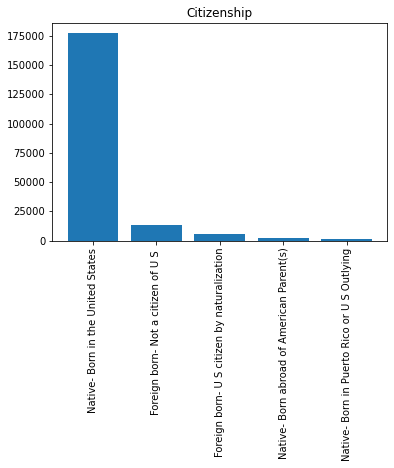

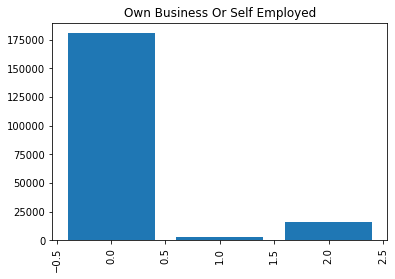

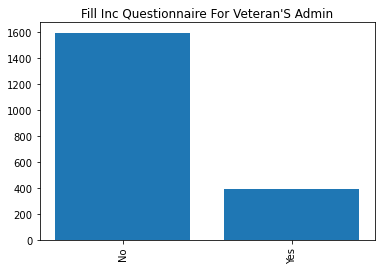

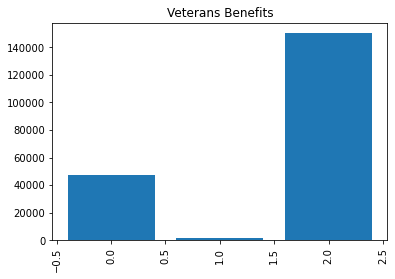

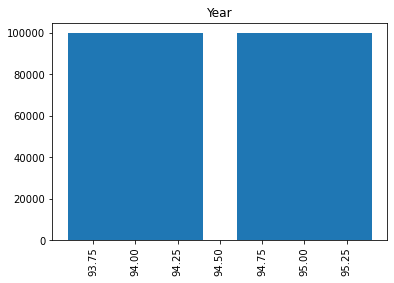

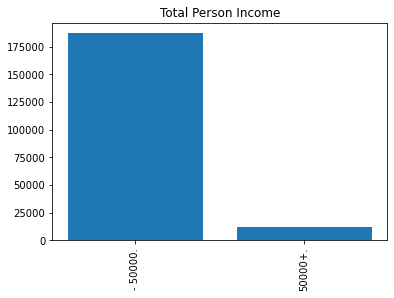

In [16]:
# bar plots [categorical]
for feature, ftdesc in zip(categorical_features, cat_desc):
    plt.bar(x=df[feature].dropna().unique(), height=df[feature].dropna().value_counts(sort=False))
    plt.xticks(rotation=90)
    plt.title(ftdesc.title())
    plt.show()

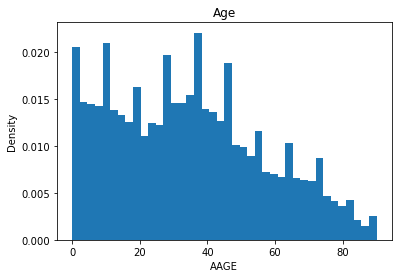

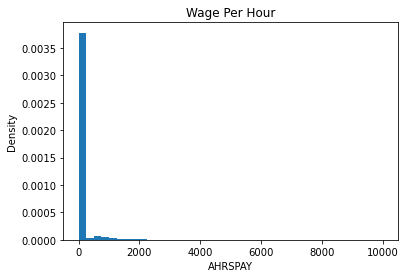

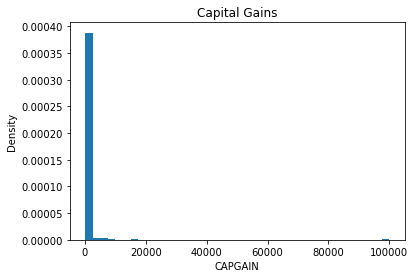

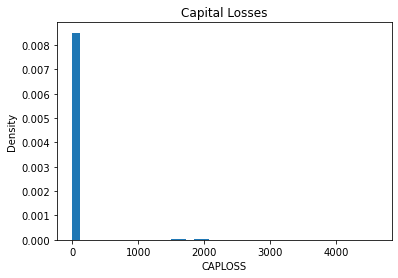

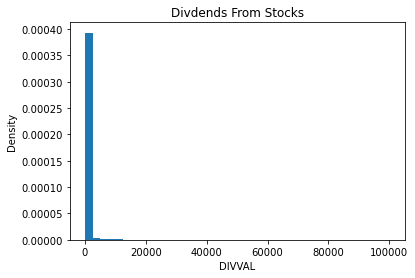

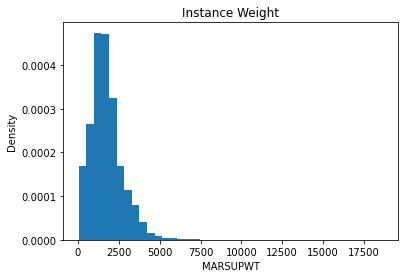

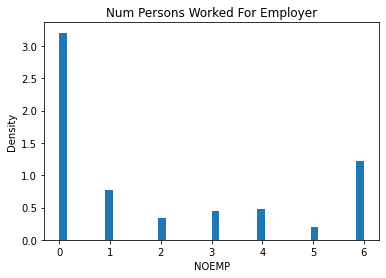

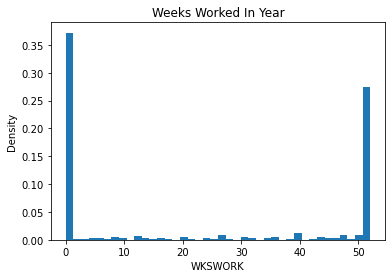

In [17]:
# histograms [continuous]
for feature, ftdesc in zip(continuous_features, cont_desc):
    plt.hist(df[feature].dropna(), bins=40, density=True)
    plt.ylabel('Density')
    plt.xlabel(feature)
    plt.title(ftdesc.title())
    plt.show()

#### Remark:
* **Bar Plots** <br>
I visualized the categorical features using a bar chart. Since each (or most) features still contained missing values `np.nan` I had to drop them using the `.dropna()` method, making it easy to identify the unique class in each feature. Also, I set the parameter `sort=False` to match the unique class with their respective counts (number of occurance of each class). 
* **Histograms** <br>
I also visualized the continuous features using histogram by comparing the proportions of intervals by setting the parameter `density=True`

### Q3 Outlier Identification (25 pts)

#### Q3.1 For each continuous feature, identify the outliers using the IQR method. (15 pts)
For each feature, report the lower and upper bounds and number of instances that are identified as outliers.
Then, display boxplots and discuss if your outliers analysis makes sense. Discuss why you would (or would not) use the IQR method.


,feature,lower bound,upper bound,num of outliers
0,AAGE,-37.5,102.5,0


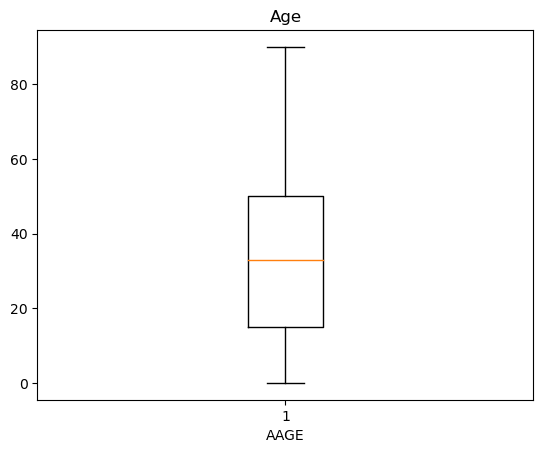

,feature,lower bound,upper bound,num of outliers
0,AHRSPAY,0.0,0.0,11304


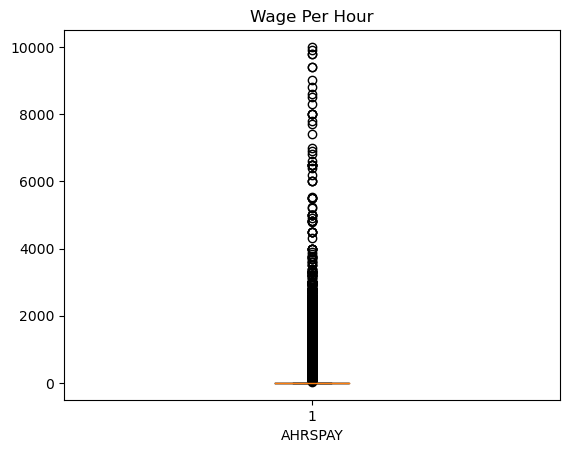

,feature,lower bound,upper bound,num of outliers
0,CAPGAIN,0.0,0.0,7379


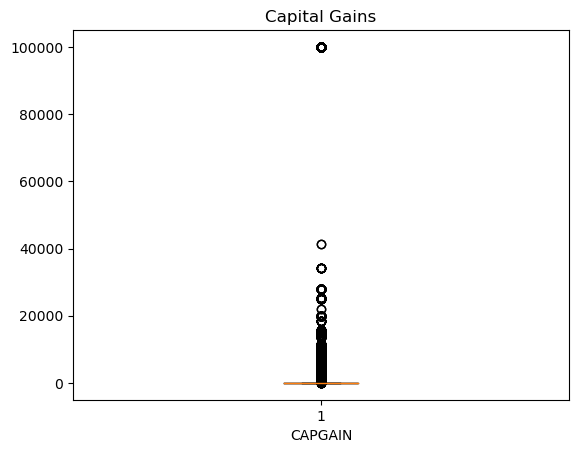

,feature,lower bound,upper bound,num of outliers
0,CAPLOSS,0.0,0.0,3906


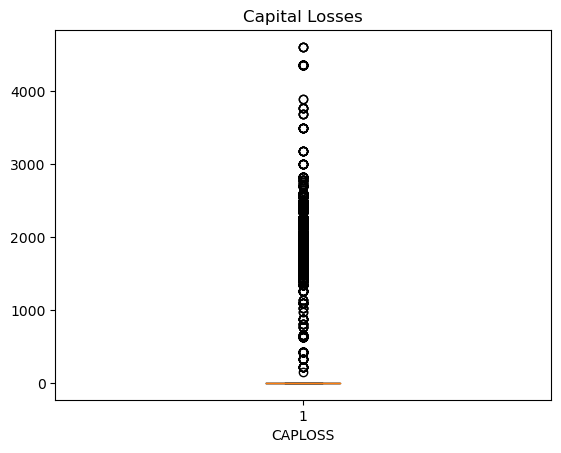

,feature,lower bound,upper bound,num of outliers
0,DIVVAL,0.0,0.0,21141


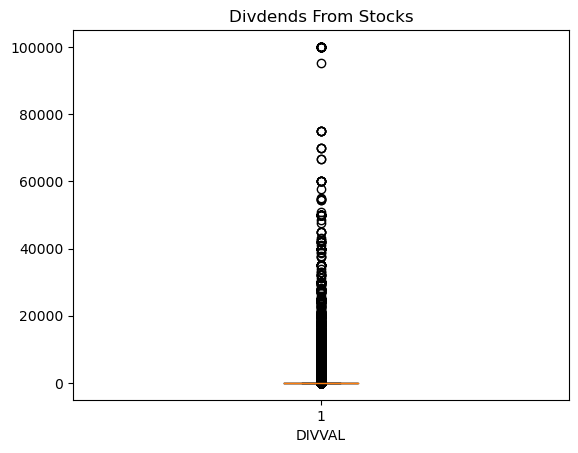

,feature,lower bound,upper bound,num of outliers
0,MARSUPWT,-628.8775,3879.1025,6238


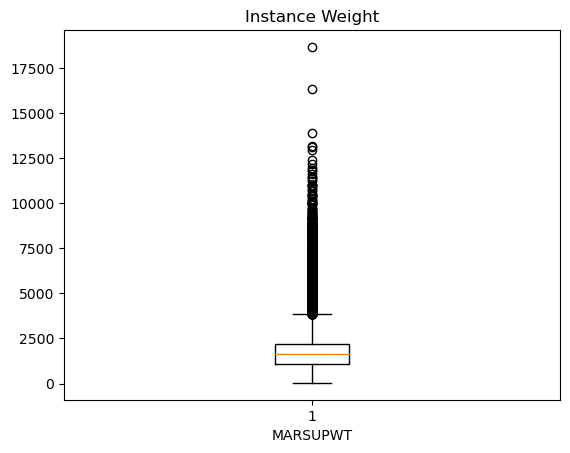

,feature,lower bound,upper bound,num of outliers
0,NOEMP,-6.0,10.0,0


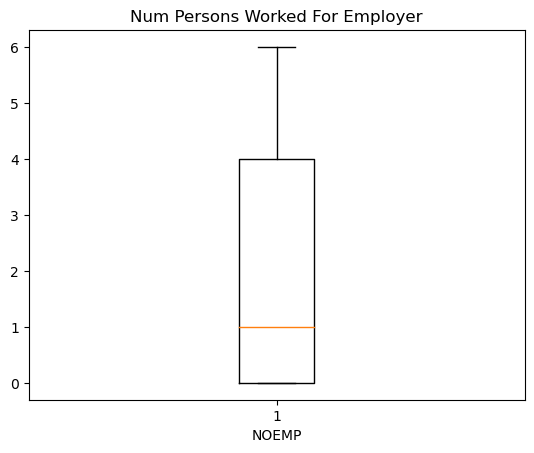

,feature,lower bound,upper bound,num of outliers
0,WKSWORK,-78.0,130.0,0


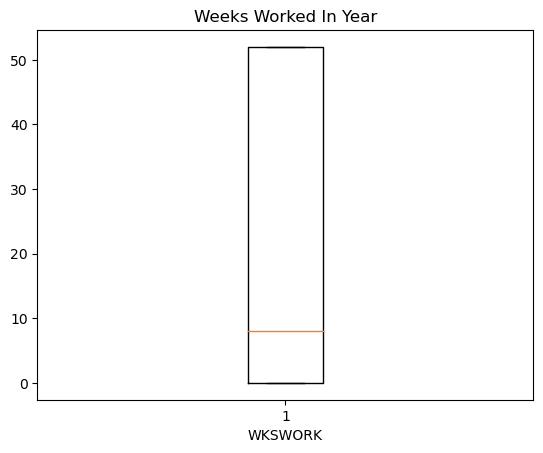

In [18]:
plt.style.use('default')
for feature, ftdesc in zip(continuous_features, cont_desc):
    odf = pd.DataFrame()
    odf['feature'] = [feature]
    q1 = df[feature].quantile(.25)
    q3 = df[feature].quantile(.75)
    lb, ub = ( q1 - 1.5 * (q3 - q1) ), ( q3 + 1.5 * (q3 - q1) )
    odf['lower bound'] = [lb]
    odf['upper bound'] = [ub]
    odf['num of outliers'] = [len(df[df[feature] < lb]) + len(df[df[feature] > ub])]
    display(odf)
    plt.boxplot(df[feature])
    plt.xlabel(feature)
    plt.title(ftdesc.title())
    plt.show()

#### Remark:
The IQR method is not a good fit for continuous features like "AHRSPAY", "CAPGAIN", "CAPLOSS", and "DIVVAL" because of the number of instances where the values are zeroes.
From my exploration, there are approximately 94%, 96%, 98%, and 89% of values set to zero respectively. This suspected error creates the impression that Q1, Q3, and IQR are all zeroes.

On the other hand, IQR is a great fit for features like "AAGE", "NOEMP", "WKSWORK", and "MARSUPWT". It clearly shows the box plot and also some values which may be considered as outliers in the case of "MARSUPWT"

#### Q3.2. Replace the outlying values in WKSWORK, MARSUPWT and AAGE features. (10 pts)
Use clamping with upper and lower bounds you found in the previous step. Report how many individual cells are being updated for each feature.


In [19]:
outlier_df = pd.DataFrame()

feat = ["WKSWORK", "MARSUPWT", "AAGE"]
for ft in feat:
    odf2 = pd.DataFrame()
    odf2['feature'] = [ft]
    q1 = df[ft].quantile(.25, interpolation='midpoint')
    q3 = df[ft].quantile(.75, interpolation='midpoint')
    lb, ub = ( q1 - 1.5 * (q3 - q1) ), ( q3 + 1.5 * (q3 - q1) )
    odf2['num of outliers'] = [len(df[df[ft] < lb]) + len(df[df[ft] > ub])]
    df[ft] = df[ft].clip(lb, ub)
    odf2['outliers after clamping'] = [len(df[df[ft] < lb]) + len(df[df[ft] > ub])]
    outlier_df = pd.concat([outlier_df, odf2], axis = 0, ignore_index = True)

outlier_df

,feature,num of outliers,outliers after clamping
0,WKSWORK,0,0
1,MARSUPWT,6238,0
2,AAGE,0,0


### Q4 Normalization (10 pts)

Normalize the MARSUPWT, AAGE, NOEMP, CAPGAIN, and CAPLOSS features
* Use range normalization for MARSUPWT feature
* Use robust scaling for NOEMP feature
* Use Z-score normalization for AAGE feature
* Use log scaling for CAPGAIN and CAPLOSS features (impute your zero values with 10 before transformation to avoid undefined  $log_{b}0$)

In [20]:
df["MARSUPWT"] = (df["MARSUPWT"] - df["MARSUPWT"].min()) / (df["MARSUPWT"].max() - df["MARSUPWT"].min())
df["NOEMP"] = (df["NOEMP"] - df["NOEMP"].median()) / (df["NOEMP"].quantile(.75, interpolation='midpoint') - df["NOEMP"].quantile(.25, interpolation='midpoint'))
df["AAGE"] = (df["AAGE"] - df["AAGE"].mean()) / df["AAGE"].std()
df.loc[:,["CAPGAIN", "CAPLOSS"]] = df.loc[:,["CAPGAIN", "CAPLOSS"]].replace(0, 10)
df["CAPGAIN"] = df["CAPGAIN"] / (10 ** np.ceil(np.log10(df["CAPGAIN"].max())))
df["CAPLOSS"] = df["CAPLOSS"] / (10 ** np.ceil(np.log10(df["CAPLOSS"].max())))

df[['MARSUPWT', 'AAGE', 'NOEMP', 'CAPGAIN', 'CAPLOSS']].head()

,MARSUPWT,AAGE,NOEMP,CAPGAIN,CAPLOSS
0,0.432731,1.725874,-0.25,0.0001,0.001
1,0.264415,1.053557,0.00,0.0001,0.001
2,0.248379,-0.739289,-0.25,0.0001,0.001
3,0.447843,-1.142679,-0.25,0.0001,0.001
4,0.268479,-1.097858,-0.25,0.0001,0.001
